In [2]:
# install geopandas: conda install -c conda-forge geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import re

%matplotlib inline

In [40]:
fp='NorthCarolinaVulnerability/NORTHCAROLINA.shp'

In [41]:
ncdata=gpd.read_file(fp)

Looking for certain counties

In [ ]:
ctlist=list(ncdata['COUNTY'].unique())
ctlist.sort()

In [44]:
ctdata=ncdata[ctdata['COUNTY']=='Cumberland']
ctdata.head()

ST           STATE ST_ABBR STCNTY      COUNTY         FIPS  \
3    37  NORTH CAROLINA      NC  37051  Cumberland  37051980100   
382  37  NORTH CAROLINA      NC  37051  Cumberland  37051000200   
383  37  NORTH CAROLINA      NC  37051  Cumberland  37051000500   
384  37  NORTH CAROLINA      NC  37051  Cumberland  37051000600   
385  37  NORTH CAROLINA      NC  37051  Cumberland  37051000701   

                                              LOCATION  AREA_SQMI  E_TOTPOP  \
3    Census Tract 9801, Cumberland County, North Ca...  35.598407       0.0   
382  Census Tract 2, Cumberland County, North Carolina   2.614907    2148.0   
383  Census Tract 5, Cumberland County, North Carolina   1.698971    2231.0   
384  Census Tract 6, Cumberland County, North Carolina   1.958945    5573.0   
385  Census Tract 7.01, Cumberland County, North Ca...   2.456289    5539.0   

     M_TOTPOP                        ...                          F_NOVEH  \
3        12.0                        ...                           -999.0   
382     213.0                        ...                              1.0   
383     200.0                        ...                              1.0   
384     497.0                        ...                              0.0   
385     389.0                        ...                              0.0   

     F_GROUPQ  F_THEME4  F_TOTAL  E_UNINSUR  M_UNINSUR  EP_UNINSUR  \
3      -999.0    -999.0   -999.0        0.0       12.0      -999.0   
382       0.0       1.0      7.0      326.0      101.0        15.2   
383       0.0       1.0      5.0      354.0       69.0        16.1   
384       0.0       0.0      0.0      666.0      314.0        12.4   
385       0.0       0.0      0.0      323.0      128.0         5.9   

     MP_UNINSUR  E_DAYPOP                                           geometry  
3        -999.0    5250.0  POLYGON ((-79.11285299999997 35.12591200000003...  
382         4.6    3723.0  POLYGON ((-78.89540299999999 35.02078500000005...  
383         2.9    3063.0  POLYGON ((-78.92230799999999 35.01844900000003...  
384         5.5    6247.0  POLYGON ((-78.93500899999998 35.04437100000007...  
385         2.3    7774.0  POLYGON ((-78.95479899999998 35.05937600000004...  

[5 rows x 125 columns]

# CDC Social Vulnerability Plot

In [162]:
lookinglist={'F_THEME1':'Socioeconomic',
             'F_THEME2':'Household Composition Disability',
             'F_THEME3':'Minority Status Language',
             'F_THEME4':'Housing Transportation',
             'F_TOTAL':'Overall'}

In [149]:
i

'F_TOTAL'

In [157]:
"CDC\\"+i+'NCRate.png'

'CDC\\F_TOTALNCRate.png'

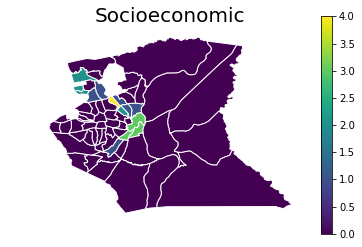

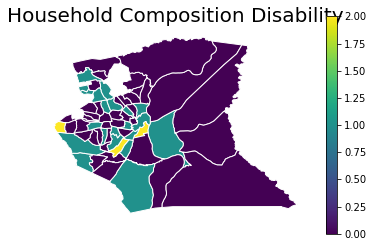

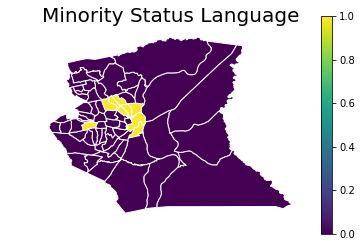

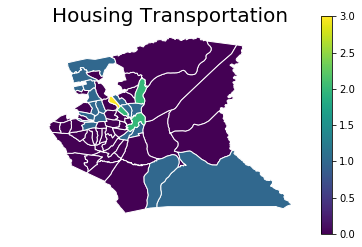

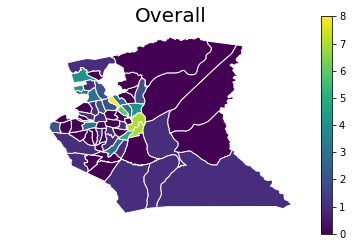

In [163]:
for i in lookinglist:
    plotdata=ctdata[ctdata[i]>=0]
    plotdata.plot(column=i,linewidth=1,edgecolor='1',legend=True)
    plt.title(lookinglist[i],fontsize=20)
    plt.axis('off')
    plt.savefig(lookinglist[i]+'.png',dpi=100)
    plt.show()

ST           STATE ST_ABBR STCNTY      COUNTY         FIPS  \
3  37  NORTH CAROLINA      NC  37051  Cumberland  37051980100   

                                            LOCATION  AREA_SQMI  E_TOTPOP  \
3  Census Tract 9801, Cumberland County, North Ca...  35.598407       0.0   

   M_TOTPOP                        ...                          F_NOVEH  \
3      12.0                        ...                           -999.0   

   F_GROUPQ  F_THEME4  F_TOTAL  E_UNINSUR  M_UNINSUR  EP_UNINSUR  MP_UNINSUR  \
3    -999.0    -999.0   -999.0        0.0       12.0      -999.0      -999.0   

   E_DAYPOP                                           geometry  
3    5250.0  POLYGON ((-79.11285299999997 35.12591200000003...  

[1 rows x 125 columns]

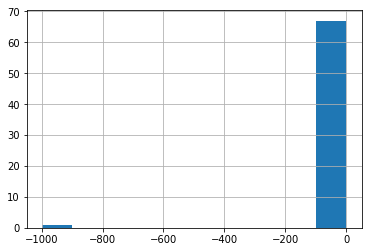

In [105]:
ctdata['F_THEME3'].hist()
ctdata['F_THEME3'].sort_values(ascending=False)
ctdata[ctdata['F_THEME3']<0]

In [112]:
ctdata['F_THEME3'].dtype

dtype('float64')

In [134]:
fpDFIRM='DFIRM/s_trnsport_ln.shp'

In [135]:
DFIRM=gpd.read_file(fpDFIRM)

In [140]:
DFIRM.head()

TRANS_ID   TRANS_TYP RD_STAT PREFIX    FEAT_NM1 NM_TYP SUFFIX FEAT_NM2  \
0        1  PRIMARY RD   PAVED   None      Health  Drive   None     None   
1        2  PRIMARY RD   PAVED   None     Unnamed   None   None     None   
2        3  PRIMARY RD   PAVED   None    Foxcroft  Court   None     None   
3        4  PRIMARY RD   PAVED   None       Kells  Court   None     None   
4        5  PRIMARY RD   PAVED   None  Cranbrooke  Drive   None     None   

  FEAT_NM3 SOURCE_CIT                                           geometry  
0     None      BASE1  LINESTRING (765796.1875 3380688.75, 765764.25 ...  
1     None      BASE1  LINESTRING (766499.5 3380755.25, 766500.625 33...  
2     None      BASE1  LINESTRING (765927.0625 3380728, 765921.5 3380...  
3     None      BASE1  LINESTRING (766863 3380661.75, 766844.4375 338...  
4     None      BASE1  LINESTRING (766391 3380684.25, 766359.25 33806...

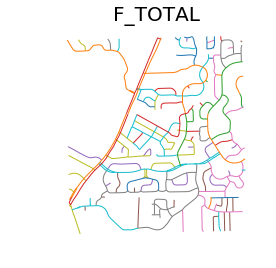

In [141]:
DFIRM.plot(column='TRANS_ID',linewidth=1,edgecolor='1')
plt.title(i,fontsize=20)
plt.axis('off')
plt.show()

In [ ]:
ctlist=list(ncdata['COUNTY'].unique())
ctlist.sort()

In [44]:
ctdata=ncdata[ctdata['COUNTY']=='Cumberland']
ctdata.head()

ST           STATE ST_ABBR STCNTY      COUNTY         FIPS  \
3    37  NORTH CAROLINA      NC  37051  Cumberland  37051980100   
382  37  NORTH CAROLINA      NC  37051  Cumberland  37051000200   
383  37  NORTH CAROLINA      NC  37051  Cumberland  37051000500   
384  37  NORTH CAROLINA      NC  37051  Cumberland  37051000600   
385  37  NORTH CAROLINA      NC  37051  Cumberland  37051000701   

                                              LOCATION  AREA_SQMI  E_TOTPOP  \
3    Census Tract 9801, Cumberland County, North Ca...  35.598407       0.0   
382  Census Tract 2, Cumberland County, North Carolina   2.614907    2148.0   
383  Census Tract 5, Cumberland County, North Carolina   1.698971    2231.0   
384  Census Tract 6, Cumberland County, North Carolina   1.958945    5573.0   
385  Census Tract 7.01, Cumberland County, North Ca...   2.456289    5539.0   

     M_TOTPOP                        ...                          F_NOVEH  \
3        12.0                        ...                           -999.0   
382     213.0                        ...                              1.0   
383     200.0                        ...                              1.0   
384     497.0                        ...                              0.0   
385     389.0                        ...                              0.0   

     F_GROUPQ  F_THEME4  F_TOTAL  E_UNINSUR  M_UNINSUR  EP_UNINSUR  \
3      -999.0    -999.0   -999.0        0.0       12.0      -999.0   
382       0.0       1.0      7.0      326.0      101.0        15.2   
383       0.0       1.0      5.0      354.0       69.0        16.1   
384       0.0       0.0      0.0      666.0      314.0        12.4   
385       0.0       0.0      0.0      323.0      128.0         5.9   

     MP_UNINSUR  E_DAYPOP                                           geometry  
3        -999.0    5250.0  POLYGON ((-79.11285299999997 35.12591200000003...  
382         4.6    3723.0  POLYGON ((-78.89540299999999 35.02078500000005...  
383         2.9    3063.0  POLYGON ((-78.92230799999999 35.01844900000003...  
384         5.5    6247.0  POLYGON ((-78.93500899999998 35.04437100000007...  
385         2.3    7774.0  POLYGON ((-78.95479899999998 35.05937600000004...  

[5 rows x 125 columns]